In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("chd.csv")



In [4]:
df.head()


,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Obs     100 non-null    int64
 1   ID      100 non-null    int64
 2   AGE     100 non-null    int64
 3   agrp    100 non-null    int64
 4   CHD     100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [8]:
df.dropna()

,Obs,ID,AGE,agrp,CHD
0,1,1,20,1,0
1,2,2,23,1,0
2,3,3,24,1,0
3,4,4,25,1,0
4,5,5,25,1,1
...,...,...,...,...,...
95,96,96,63,8,1
96,97,97,64,8,0
97,98,98,64,8,1
98,99,99,65,8,1


In [9]:
df.isnull().sum()

Obs     0
ID      0
AGE     0
agrp    0
CHD     0
dtype: int64

In [16]:
X = df[['ID']]
y = df['CHD']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
model = LogisticRegression(max_iter=200)


In [19]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [20]:
y_pred = model.predict(X_test)


In [21]:
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
comparison.head()


,Actual,Predicted
83,1,1
53,1,0
70,1,1
45,0,0
44,1,0


In [22]:
accuracy_score(y_test, y_pred)


0.6

In [23]:
confusion_matrix(y_test, y_pred)


array([[8, 3],
       [5, 4]])

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



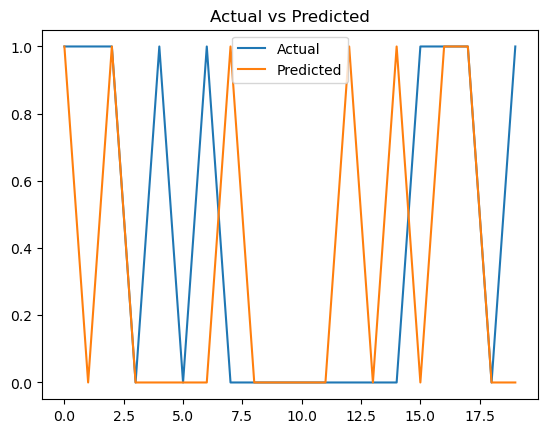

In [28]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()



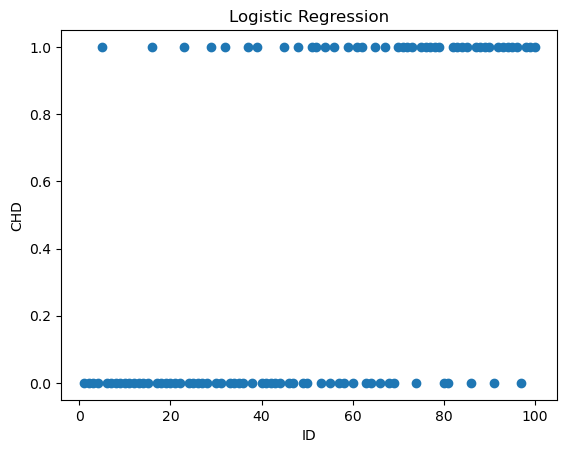

In [30]:
plt.scatter(X, y)
plt.xlabel("ID")
plt.ylabel("CHD")
plt.title("Logistic Regression")
plt.show()
